In [2]:
library(tidyverse) 
library(ggExtra)
library(ggthemes)
library(forecast)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
v purrr   0.3.3     
Warning message:
"package 'tidyr' was built under R version 3.6.2"Warning message:
"package 'dplyr' was built under R version 3.6.2"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter()  masks stats::filter()
x purrr::flatten() masks jsonlite::flatten()
x dplyr::lag()     masks stats::lag()


In [28]:
champ <- read_table("champagne.txt", col_names = F)
n <- nrow(champ)
champ.ts <- ts(champ,start=c(1882,1),frequency = 12)
date <- seq(as.Date("1882/1/1"), length.out = n, by = "month")
year <- substr(as.character(date),1, 4)
champ <- tibble(volume = champ$X1, time = date, year = year) 

Parsed with column specification:
cols(
  X1 = col_double()
)


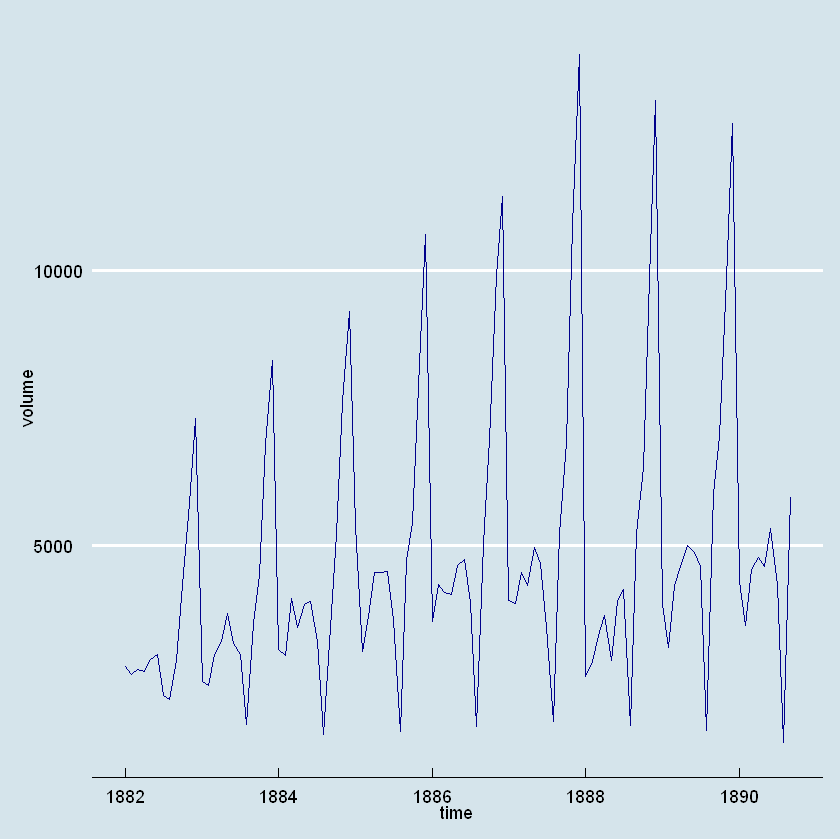

In [22]:
ggplot(data = champ, aes(x = time, y = volume)) +
                  geom_line(data = champ, aes(x = time, y = volume), color = "darkblue") +
                  theme_economist() +
                  scale_color_economist()

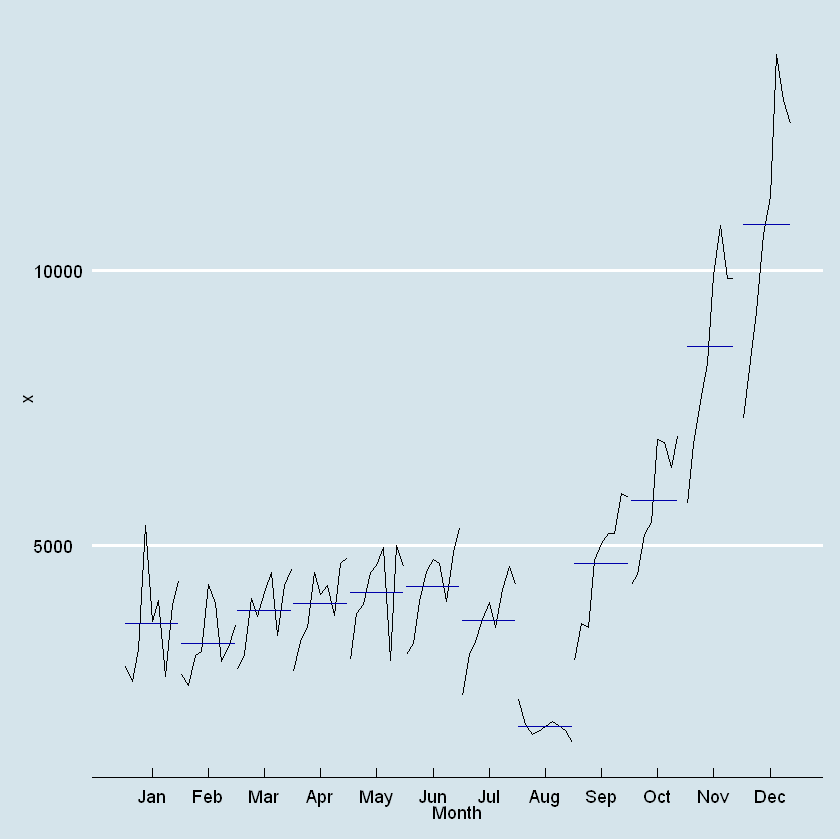

In [23]:
ggmonthplot(champ.ts) +
      scale_color_economist() +
      theme_economist()

In [29]:
champ <- bind_cols(champ , logChamp = log(champ$volume))

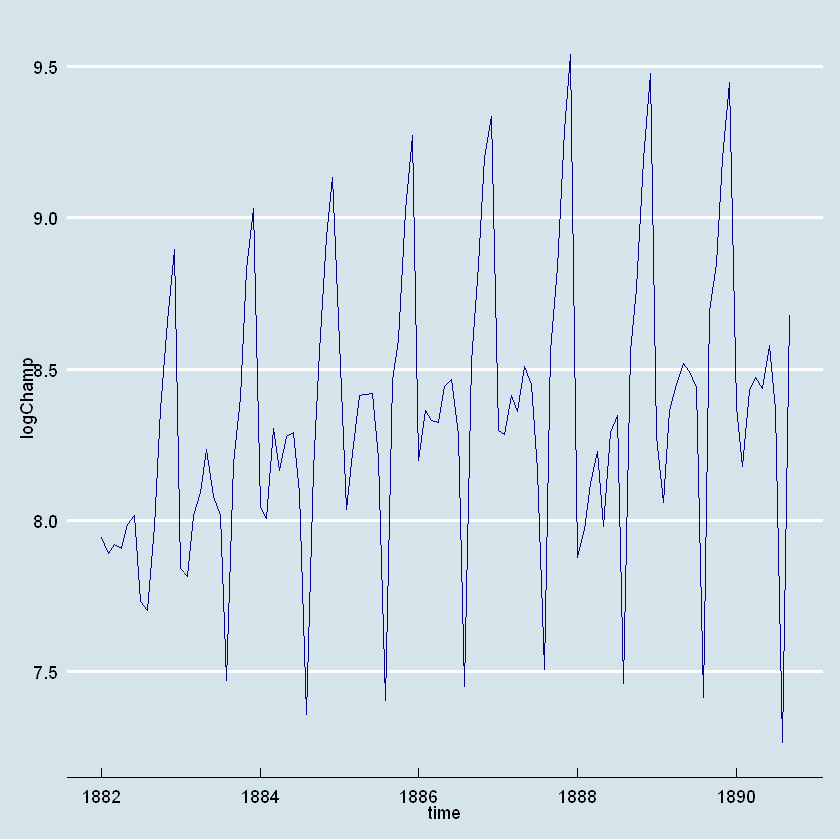

In [31]:
ggplot(data = champ, aes(x = time, y = logChamp)) +
                    geom_line(data = champ, aes(x = time, y = logChamp), color = "darkblue") +
                    theme_economist() +
                    scale_color_economist()

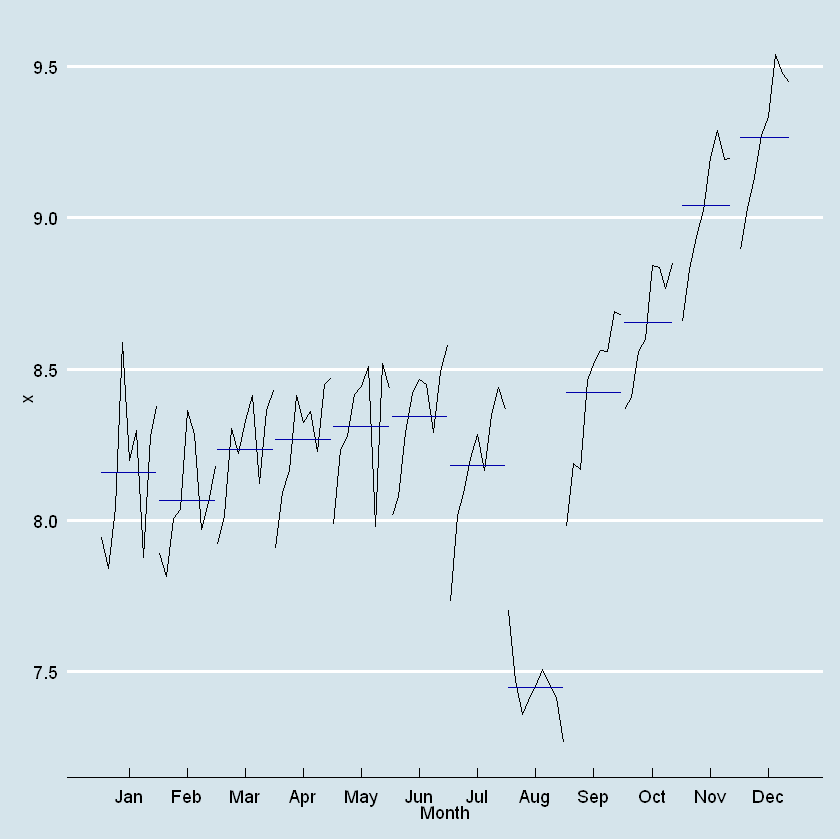

In [32]:
ggmonthplot(ts(champ$logChamp,start=c(1882,1),frequency = 12)) +
    scale_color_economist() +
    theme_economist()

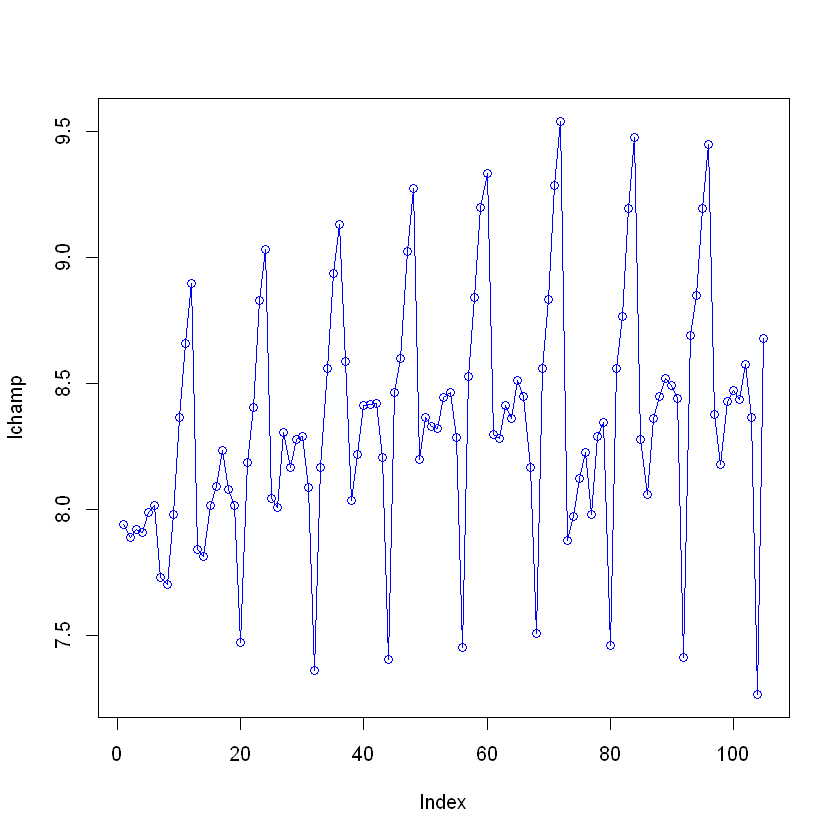

In [33]:
lchamp <- champ$logChamp
plot(lchamp, col = "blue", type ="o")

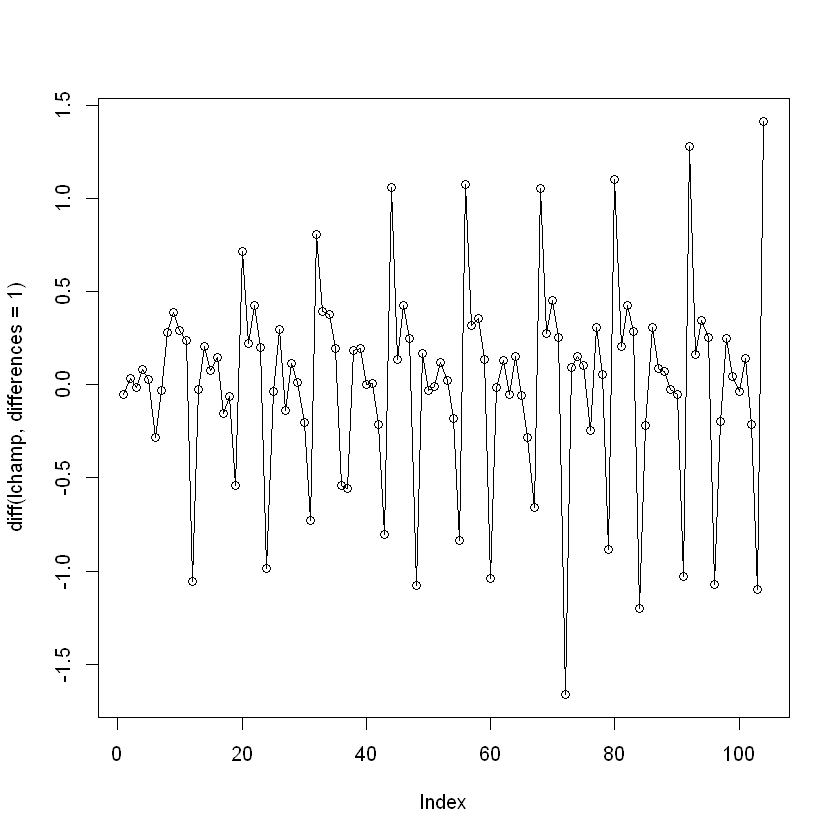

In [39]:
plot(diff(lchamp, differences = 1), type = "o")

[1] 0.007077732

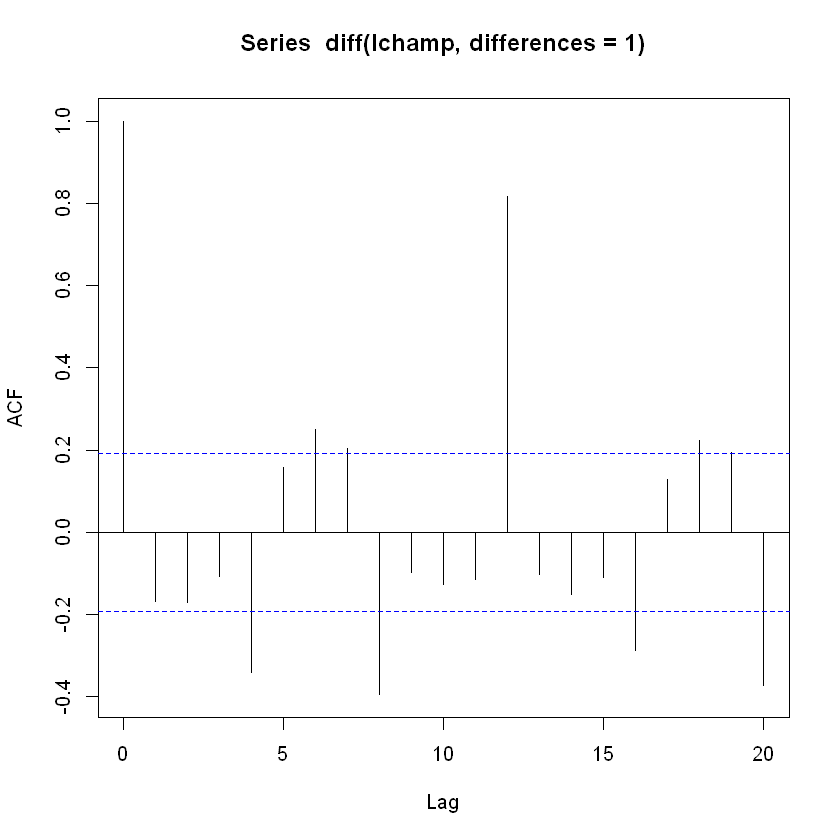

In [40]:
mean(diff(lchamp, differences = 1))
acf(diff(lchamp, differences = 1))

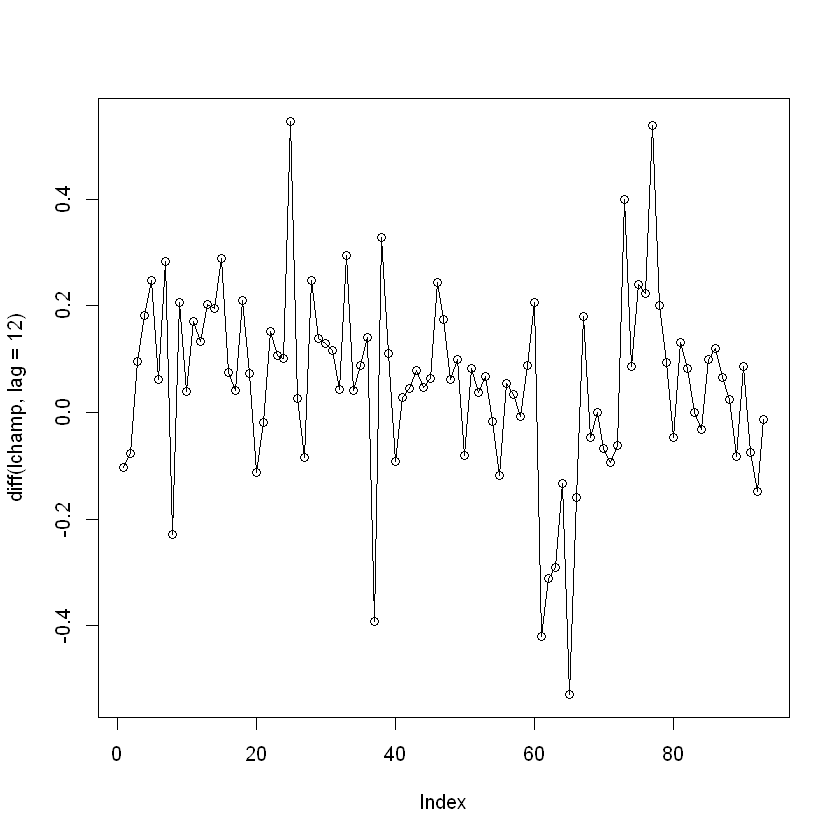

In [42]:
plot(diff(lchamp, lag = 12), type = "o")

[1] 0.05667579

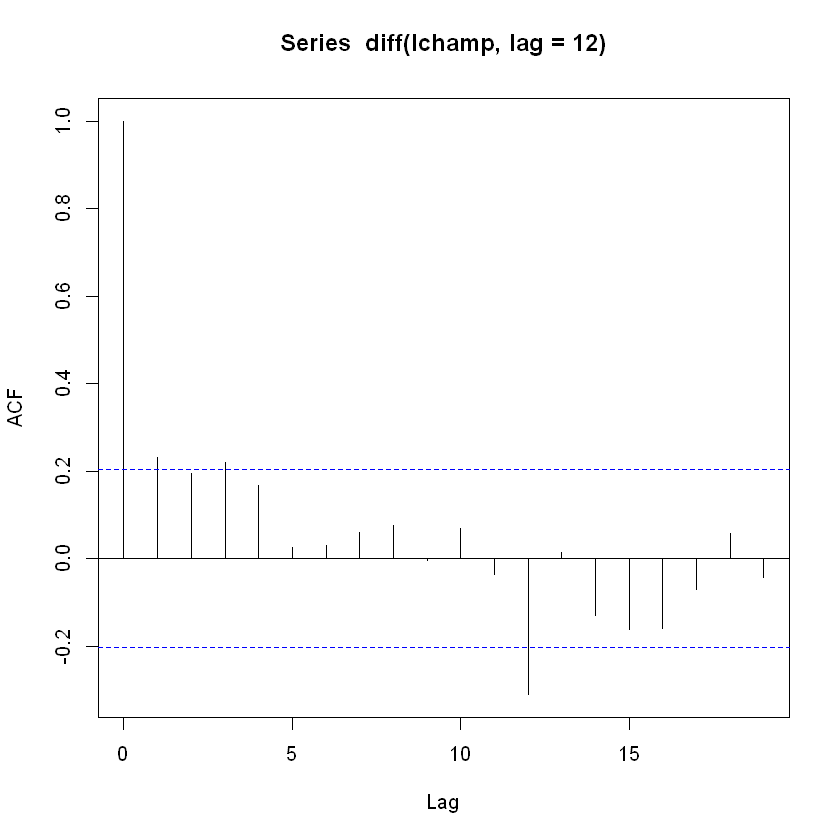

In [43]:
mean(diff(lchamp, lag = 12))
acf(diff(lchamp, lag = 12))

In [49]:
t <- 1:105
sinusoides <- t%o%c(rep(1:5,2))*pi/6

In [75]:
sinusoides[,1:5] <- sin(sinusoides[,1:5])
sinusoides[,6:10] <- cos(sinusoides[,6:10])
sinusoides <- as_tibble(sinusoides)
names(sinusoides) <- c(paste("sin",1:5),paste("cos",1:5))

Warning message:
"`as_tibble.matrix()` requires a matrix with column names or a `.name_repair` argument. Using compatibility `.name_repair`.
This warning is displayed once per session."

In [119]:
dim(sinusoides)

[1] 105  10

In [79]:
df <- bind_cols(tibble(lchamp, t, t^2, t^3), sinusoides)

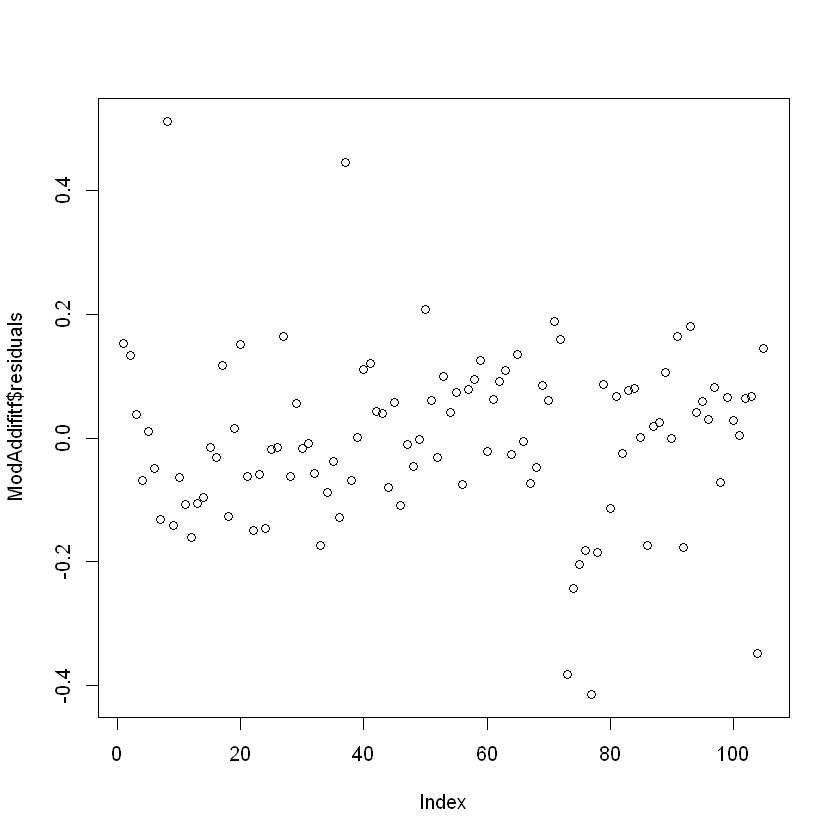

In [81]:
ModAddifitf <- lm(data = df, lchamp ~ .)
plot(ModAddifitf$residuals)

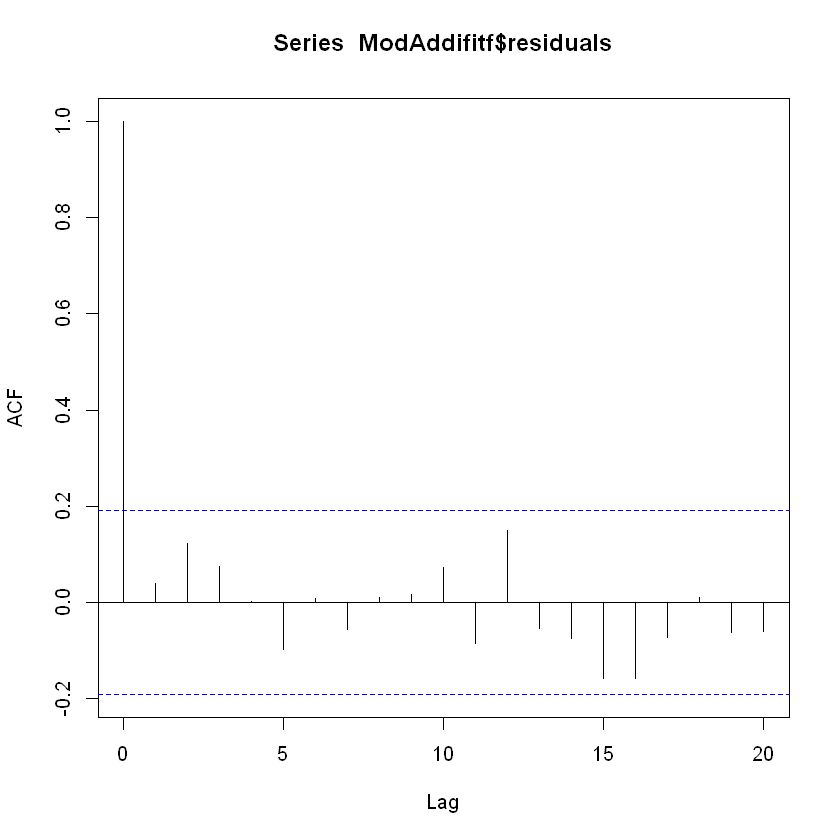

In [83]:
acf(ModAddifitf$residuals)

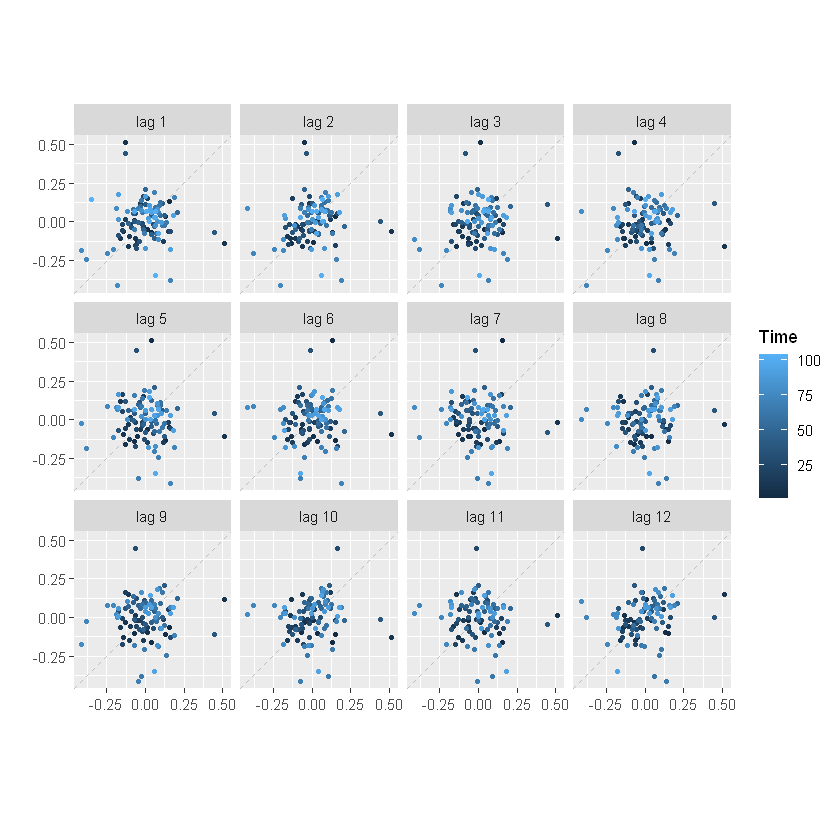

In [85]:
gglagplot(ModAddifitf$residuals, do.lines = F, lags=12)

In [86]:
summary(ModAddifitf)


Call:
lm(formula = lchamp ~ ., data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.41438 -0.07218  0.00035  0.07844  0.51165 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  7.983e+00  5.933e-02 134.550  < 2e-16 ***
t            1.523e-02  4.821e-03   3.159  0.00215 ** 
`t^2`       -1.661e-04  1.054e-04  -1.577  0.11829    
`t^3`        6.652e-07  6.536e-07   1.018  0.31146    
`sin 1`     -4.545e-02  2.011e-02  -2.260  0.02619 *  
`sin 2`     -3.448e-01  2.010e-02 -17.157  < 2e-16 ***
`sin 3`     -9.109e-02  1.997e-02  -4.561 1.58e-05 ***
`sin 4`      6.105e-02  2.006e-02   3.043  0.00306 ** 
`sin 5`     -1.246e-01  1.997e-02  -6.239 1.37e-08 ***
`cos 1`      3.422e-01  2.025e-02  16.895  < 2e-16 ***
`cos 2`      2.611e-01  2.007e-02  13.008  < 2e-16 ***
`cos 3`     -1.822e-02  2.018e-02  -0.903  0.36915    
`cos 4`      1.959e-01  2.008e-02   9.756 8.26e-16 ***
`cos 5`      1.337e-01  2.016e-02   6.634 2.29e-09 ***
---
Signif. c

In [88]:
selection <- step(ModAddifitf, trace = F)
summary(selection)


Call:
lm(formula = lchamp ~ t + `t^2` + `sin 1` + `sin 2` + `sin 3` + 
    `sin 4` + `sin 5` + `cos 1` + `cos 2` + `cos 4` + `cos 5`, 
    data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43124 -0.07415  0.00890  0.07206  0.48056 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.025e+00  4.352e-02 184.402  < 2e-16 ***
t            1.071e-02  1.895e-03   5.651 1.74e-07 ***
`t^2`       -6.036e-05  1.732e-05  -3.485 0.000754 ***
`sin 1`     -4.718e-02  1.998e-02  -2.361 0.020305 *  
`sin 2`     -3.445e-01  2.007e-02 -17.167  < 2e-16 ***
`sin 3`     -9.109e-02  1.995e-02  -4.566 1.52e-05 ***
`sin 4`      6.032e-02  2.003e-02   3.011 0.003353 ** 
`sin 5`     -1.254e-01  1.994e-02  -6.288 1.03e-08 ***
`cos 1`      3.412e-01  2.020e-02  16.893  < 2e-16 ***
`cos 2`      2.615e-01  2.004e-02  13.049  < 2e-16 ***
`cos 4`      1.972e-01  2.004e-02   9.841 4.44e-16 ***
`cos 5`      1.342e-01  2.013e-02   6.665 1.85e-09 ***
---
Signif. cod

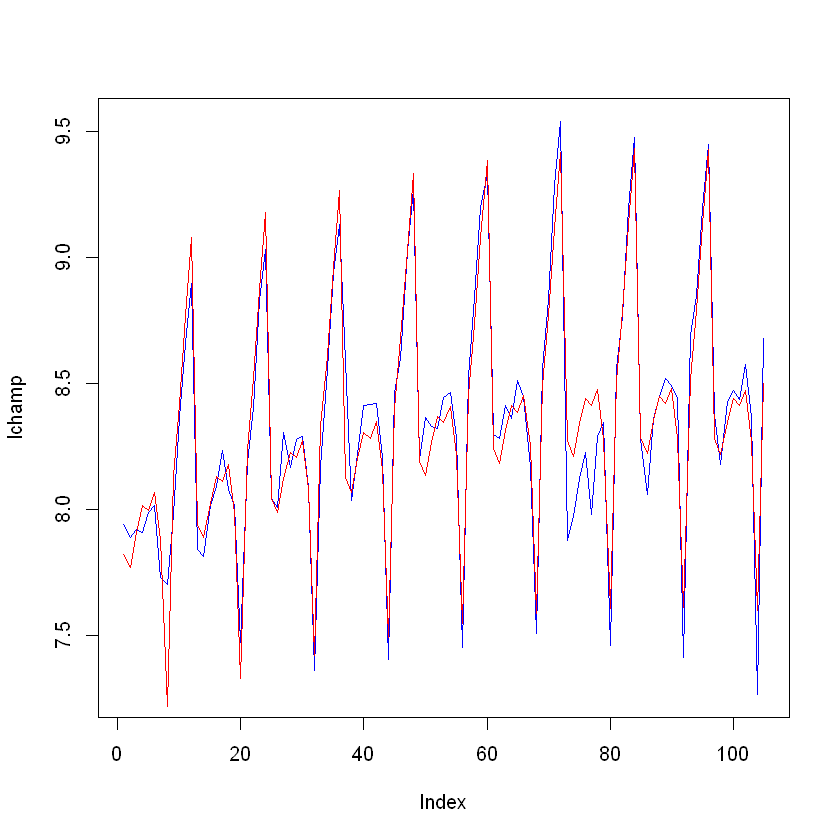

In [90]:
plot(lchamp, col = "blue", type = "l")
lines(selection$fitted.values, col = "red")

# Moi

In [96]:
trend = ma(champ.ts, order = 12)

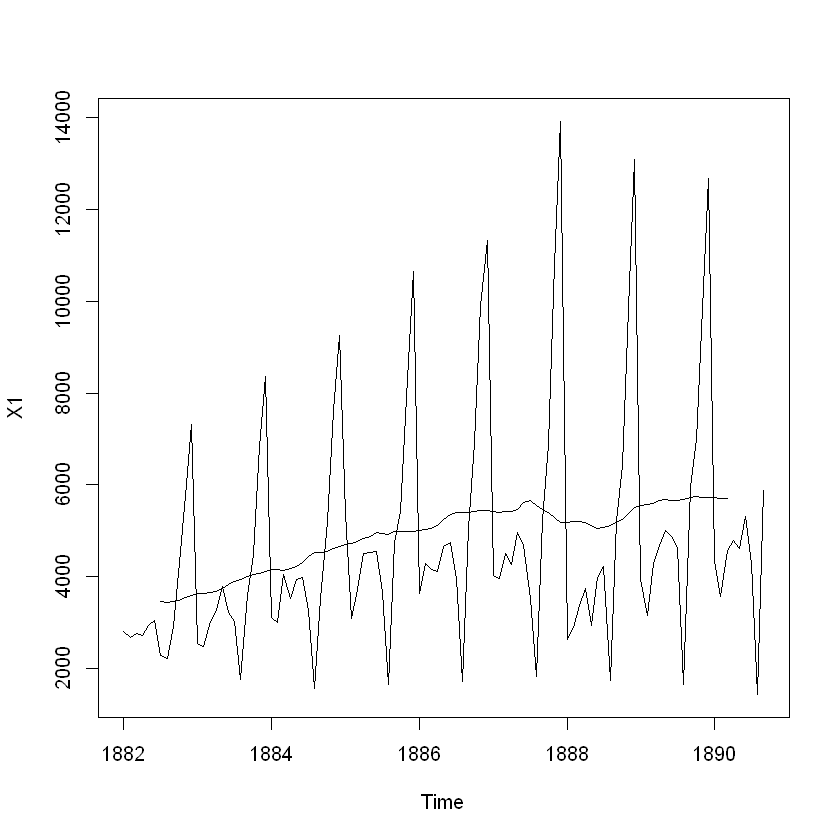

In [97]:
plot(champ.ts)
lines(trend)

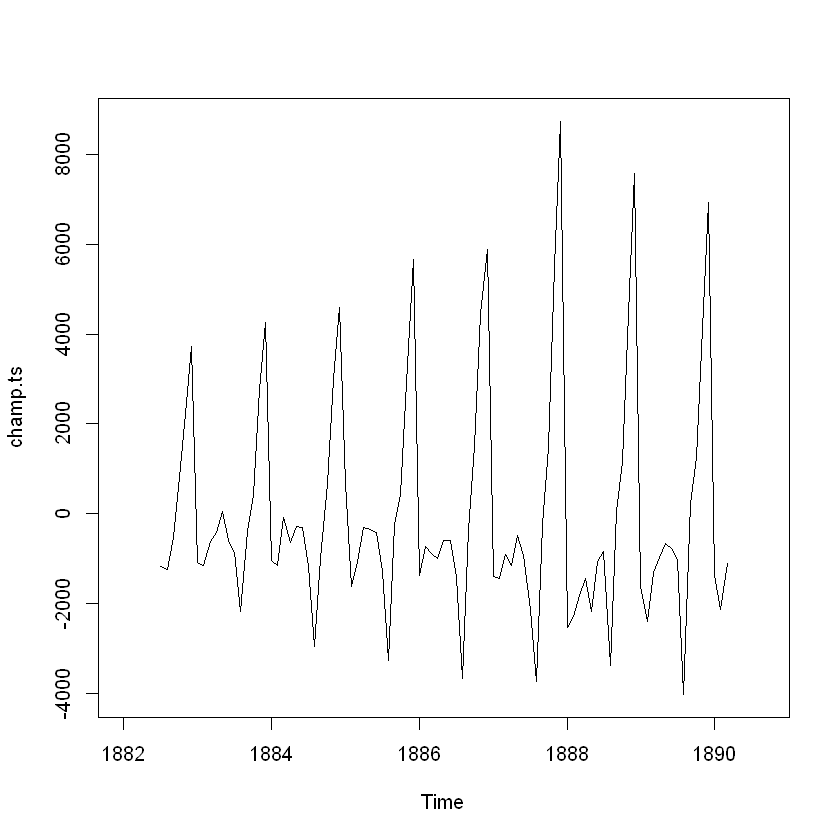

In [100]:
detrend = champ.ts - trend
detrend.ts = as.ts(detrend)
plot(detrend.ts)

In [115]:
detrend

ERROR while rich displaying an object: Error in repr_matrix_generic(obj, "\n%s%s\n", sprintf("|%%s\n|%s|\n", : argument formel "cols" correspondant à plusieurs arguments fournis

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1882,NA,NA,NA,NA,NA,NA,-1184.75000,-1235.12500,-528.41667,816.37500,2222.08333,3727.41667
1883,-1082.75000,-1160.95833,-614.12500,-414.37500,43.66667,-590.62500,-860.00000,-2174.95833,-403.41667,422.54167,2769.12500,4249.91667
1884,-1035.25000,-1144.16667,-92.62500,-644.54167,-293.58333,-314.29167,-1171.91667,-2956.58333,-991.29167,664.12500,3001.54167,4594.20833
1885,675.37500,-1631.33333,-1054.70833,-318.20833,-350.41667,-418.79167,-1280.41667,-3278.00000,-250.33333,436.87500,3333.95833,5656.75000
1886,-1382.75000,-739.66667,-893.87500,-1002.00000,-604.25000,-592.58333,-1424.87500,-3668.87500,-344.75000,1507.95833,4464.12500,5886.91667
1887,-1406.50000,-1451.16667,-909.50000,-1148.66667,-492.29167,-928.70833,-2133.04167,-3733.58333,-241.00000,1478.83333,5517.20833,8744.04167
1888,-2533.08333,-2298.54167,-1824.04167,-1435.33333,-2189.62500,-1055.58333,-843.54167,-3387.45833,46.41667,1172.25000,4464.45833,7574.66667
1889,-1621.66667,-2407.70833,-1310.83333,-974.45833,-664.04167,-783.50000,-1024.83333,-4032.83333,230.29167,1243.50000,4125.16667,6942.25000
1890,-1384.04167,-2144.58333,-1119.00000,NA,NA,NA,NA,NA,NA,,,


Warning message in matrix(data = detrend, nrow = 12):
"la longueur des données [105] n'est pas un diviseur ni un multiple du nombre de lignes [12]"

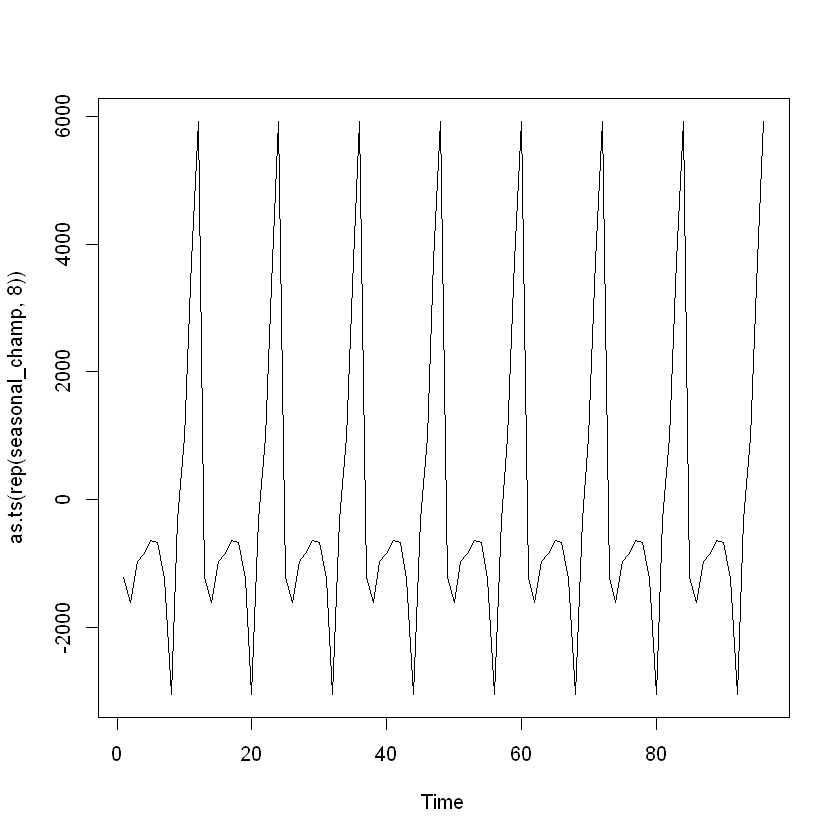

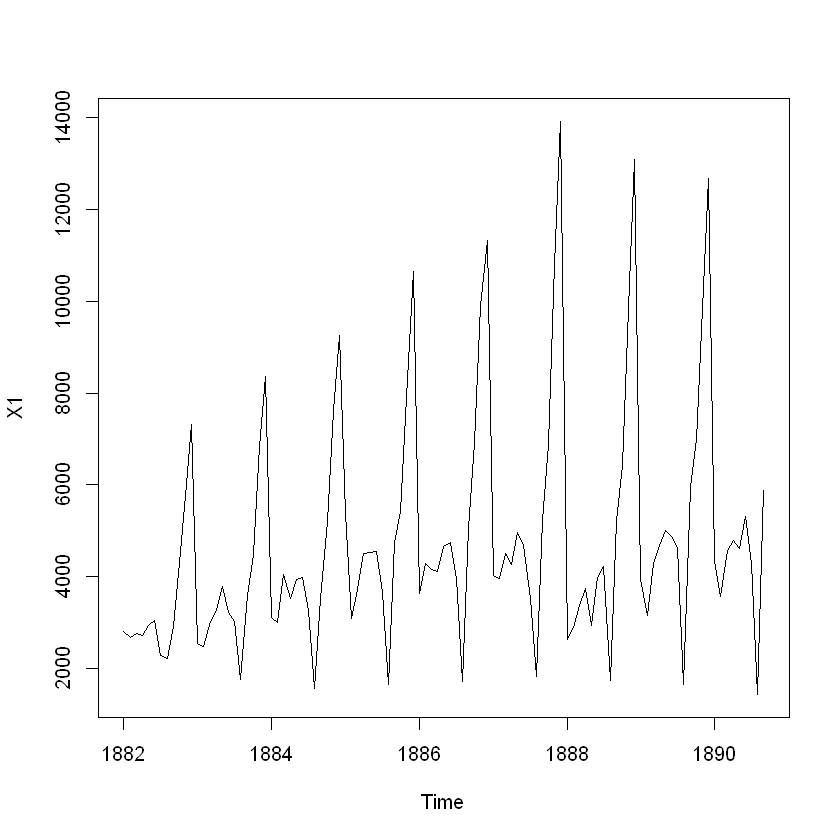

In [113]:
m_champ = t(matrix(data = detrend, nrow = 12))
seasonal_champ = colMeans(m_champ, na.rm = T)
plot(as.ts(rep(seasonal_champ,8)))
plot(champ.ts)

In [109]:
105/12

[1] 8.75